# SciPy Hypothesis Testing
Tony Nguyen

CPSC 222 01

11/22/2022

I attempted the bonus question

In [70]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

## Inpatient Rehabilitation Dataset
### Description
This dataset is the cleaned version from DA5, which contains information about 4,555 inpatients at rehabilitation hospitals. The data have been de-identified and randomized

The attributes of this dataset include:

* `ID`: Index of the dataset
* `Gender`: "M" for male and "F" for female
* `Age`: Years of age of the patient
* `Marital Status`: The description of the patient's marital status
* `RIC`: Rehabilitation Impairment Category. RIC follows the Centers of Medicaid and Medicare Services IRF-PAI training manual
* `Admission Total FIM Score`: The admission of total Functional Independence Measure (FIM) scores of the patients.
* `Discharge Total FIM Score`: The discharge total Functional Independence Measure (FIM) scores of the patients.

Functional Independence Measure (FIM) is a clinical assessment used to measure patient functioning at inpatient rehabilitation hospitals, which is measured at two distinct points in time: admission and discharge. The FIM takes into account the level of assistance required to perform 18 activities of daily living tasks (13 motor and 5 cognitive activities) on a scale of 7-point for each task.

Since we need to know if the mean age of women who had a stroke greater than the mean age of men who had a stroke, we are performing two samples (male and female), one-tailed (we want to know which group mean is greater), independent (the genders are different) test. 

In [71]:
patient_df = pd.read_csv("patient_data_cleaned.csv", index_col=0)
patient_df

,Gender,Age,Marital Status,RIC,Admission Total FIM Score,Discharge Total FIM Score
ID,,,,,,
0,M,80,Widowed,ReplLE,40,89
1,M,90,Divorced,Stroke,65,75
2,M,53,Married,TBI,67,99
3,F,69,Married,Pulmonary,41,67
4,F,80,Married,NTBI,66,65
...,...,...,...,...,...,...
4550,F,20,Married,TSCI,39,61
4551,M,82,Widowed,NTBI,59,50
4552,M,44,Married,MMT-BSCI,39,96


In [72]:
male_group = patient_df[(patient_df.Gender == "M") & (patient_df.RIC == "Stroke")]["Age"]
male_group

ID
1       90
19      60
29      56
31      69
37      61
        ..
4528    93
4529    64
4531    70
4542    66
4545    57
Name: Age, Length: 607, dtype: int64

In [73]:
female_group = patient_df[(patient_df.Gender == "F") & (patient_df.RIC == "Stroke")]["Age"]
female_group

ID
10      72
15      68
20      74
22      84
27      68
        ..
4456    68
4460    90
4463    41
4465    69
4508    83
Name: Age, Length: 562, dtype: int64

### Perform statistic calculation
1. Male group

In [74]:
n_male = len(male_group)
male_std = np.std(male_group, ddof=1)
male_mean = np.mean(male_group)

print("Male group sample mean is", male_mean)
print("Male group standard deviation is", male_std)
print("Male group number of sample is", n_male)

Male group sample mean is 70.07742998352553
Male group standard deviation is 13.841474052468987
Male group number of sample is 607


2. Female group

In [75]:
n_female = len(female_group)
female_std = np.std(female_group, ddof=1)
female_mean = np.mean(female_group)

print("Female group sample mean is", female_mean)
print("Female group standard deviation is", female_std)
print("Female group number of sample is", n_female)

Female group sample mean is 72.6049822064057
Female group standard deviation is 14.761702270444678
Female group number of sample is 562


### Hypothesis testing: two-sample, one-tailed independent test
1. State the null and alternative hypothesis
* $H_0$: $\mu_{female} \leq \mu_{male}$
* $H_1$: $\mu_{female} > \mu_{male}$

2. Select the significance level
* $\alpha$ = 0.01

3. Select the appropriate test statistic
$$t = \frac {\overline {X_{female}} - \overline {X_{male}}}{\sqrt {s_p^2 (\frac {1}{n_{male}} + \frac {1}{n_{female}})}}$$

$$\text {where } s_p^2 = \frac{(n_{male} - 1)s_{male}^2 + (n_{female} - 1)s_{female}^2}{n_{male} + n_{female} - 2}$$ 

* $t = \text {t-score}$
* $\overline{X} = \text {Sample mean}$
* $s_p^2 = \text {Pooled variance}$
* $s = \text {Standard deviation}$
* $n = \text {Number of sample}$

4. Formulate decision rule
* $df = n_{male} + n_{female} - 2 = 607 + 562 - 2 = 1167$
* Critical value: $t_{critical} = 2.326$
* Since $H_1$: $\mu_{female} > \mu_{male}$, we are dealing with right-tailed test. The decision rule is as follow:
    * If $t_{computed} > 2.326$, then *Reject $H_0$*
    * If $t_{computed} \leq 2.326$, then *Do no reject $H_0$*

5. Make the decision
* Compute $t_{computed}$ and $p_{value}$

In [76]:
t_computed, pval = stats.ttest_ind(female_group, male_group)
print("t_computed is:", t_computed)
print("p_value is:", pval / 2)

alpha = 0.01
t_critical = 2.326
if (pval / 2) < alpha and t_computed > t_critical:
    print("Reject H0")
elif (pval / 2) > alpha and t_computed <= t_critical:
    print("Do not reject H0")
else:
    print("Conflicting result")

t_computed is: 3.0212409378467506
p_value is: 0.0012861144659843757
Reject H0


* Write a conclusion
    * At the 0.01 significance, we can conclude that the mean age of women who had a stroke greater than the mean age of men who had a stroke

## Ed 222 and 322 student activities
### Description
The two json files contain the student activity from Gina's CPSC 222 (Fall 2021) and CPSC 322 (Spring 2021) classes, with their identifying information removed and order shuffled.

The attributes of this dataset include:
* `Views`
* `Questions`
* `Days Active`

Since we need to know if there is a difference in the number of days 222 students are active on Ed (e.g. "Days Active") compared to 322 students, we are performing a two samples (222 and 322 students), two-tailed (we want to know if two group mean are equal), independent test (two classes are independently different).

In [77]:
df_222 = pd.read_json("ed_222.json")
df_222 = df_222["Days Active"]
df_222

0     11
1      9
2     12
3     10
4      3
5      8
6     15
7      8
8      8
9      7
10     2
11     8
12     4
13     7
14     9
15     3
16    12
17    13
18     2
19    13
20    12
21    11
22    11
23    15
24     2
25     2
26    21
27     9
28    13
29     3
30     8
31    17
Name: Days Active, dtype: int64

In [78]:
df_322 = pd.read_json("ed_322.json")
df_322 = df_322["Days Active"]
df_322

0     40
1     11
2     31
3     44
4     45
      ..
57    25
58    34
59    20
60    52
61     9
Name: Days Active, Length: 62, dtype: int64

### Perform statistic calculation
1. CPSC 222 class

In [79]:
n_222 = len(df_222)
df222_std = np.std(df_222, ddof=1)
df222_mean = np.mean(df_222)

print("CPSC 222 sample mean is", df222_mean)
print("CPSC 222 standard deviation is", df222_std)
print("CPSC 222 number of sample is", n_222)

CPSC 222 sample mean is 9.0
CPSC 222 standard deviation is 4.785731480813734
CPSC 222 number of sample is 32


2. CPSC 322 class

In [80]:
n_322 = len(df_322)
df322_std = np.std(df_322, ddof=1)
df322_mean = np.mean(df_322)

print("CPSC 322 sample mean is", df322_mean)
print("CPSC 322 standard deviation is", df322_std)
print("CPSC 322 number of sample is", n_322)

CPSC 322 sample mean is 23.870967741935484
CPSC 322 standard deviation is 14.903497082149238
CPSC 322 number of sample is 62


### Hypothesis testing: two-sample, two-tailed independent test
1. State the null and alternative hypothesis
* $H_0$: $\mu_{222} = \mu_{322}$
* $H_1$: $\mu_{222} \neq \mu_{322}$

2. Select the significance level
* $\alpha$ = 0.001

3. Select the appropriate test statistic
$$t = \frac {\overline {X_{222}} - \overline {X_{322}}}{\sqrt {s_p^2 (\frac {1}{n_{222}} + \frac {1}{n_{322}})}}$$

$$\text {where } s_p^2 = \frac{(n_{222} - 1)s_{222}^2 + (n_{322} - 1)s_{322}^2}{n_{222} + n_{322} - 2}$$ 

* $t = \text {t-score}$
* $\overline{X} = \text {Sample mean}$
* $s_p^2 = \text {Pooled variance}$
* $s = \text {Standard deviation}$
* $n = \text {Number of sample}$

4. Formulate decision rule
* $df = n_{222} + n_{322} - 2 = 32 + 62 - 2 = 92$
* Critical value: $t_{critical} = 3.4$
* Since $H_1$: $\mu_{222} \neq \mu_{322}$, we are dealing with two-tailed test. The decision rule is as follow:
    * If $t_{computed} < -3.4$ or $> 3.4$, then *Reject $H_0$*
    * If $-3.4 \leq t_{computed} \leq 3.4$, then *Do no reject $H_0$*

5. Make the decision
* Compute $t_{computed}$ and $p_{value}$

In [81]:
t_computed, pval = stats.ttest_ind(df_222, df_322)
print("t_computed is:", t_computed)
print("p_value is:", pval)

alpha = 0.001
t_critical = 3.4
if pval < alpha and (t_computed > t_critical or t_computed < -t_critical):
    print("Reject H0")
elif pval > alpha and (-t_critical <= t_computed or t_computed <= t_critical):
    print("Do not reject H0")
else:
    print("Conflicting result")

t_computed is: -5.487771363199516
p_value is: 3.5684494006989487e-07
Reject H0


* Write a conclusion
    * At the 0.001 significance, we can conclude that the number of days CPSC 222 students are active on Ed is different from CPSC 322 students

## IQ1 Duration Dataset
### Description
The file contains information about all of the IQ1 durations from Gina's CPSC 222 and CPSC 315 classes in Fall 2020.

The attributes of this file include:
* `In-person`: whether the student took the quiz in person or not. 1 means in-person, and 0 means remotely
* `Hours Start to Finish`: time needed to complete the quiz, expressed as a fraction of an hour

Since we want to know whether the mean duration for students who took the quiz remotely greater than the mean duration for students who took the quiz in the classroom, we are performing two samples (in-person or remotely), one-tailed (we want to know if the value for remote is greater), independent (two groups are not related) test

For this test, I will use **ip** when refer to *in-person* and **re** for *remote* 

In [82]:
iq1_df = pd.read_csv("IQ1_quiz_durations.csv")
iq1_df

,In-person,Hours Start to Finish
0,0,0.14
1,0,0.10
2,0,0.13
3,0,0.10
4,0,0.16
...,...,...
89,1,0.12
90,1,0.09
91,1,0.09
92,1,0.07


In [83]:
ip_df = iq1_df[iq1_df["In-person"] == 1]["Hours Start to Finish"]
ip_df

48    0.13
49    0.06
50    0.15
51    0.08
52    0.13
53    0.14
54    0.12
55    0.11
56    0.10
57    0.10
58    0.10
59    0.10
60    0.11
61    0.13
62    0.10
63    0.13
64    0.07
65    0.10
66    0.08
67    0.04
68    0.08
69    0.09
70    0.05
71    0.09
72    0.17
73    0.08
74    0.06
75    0.06
76    0.14
77    0.08
78    0.09
79    0.07
80    0.08
81    0.06
82    0.07
83    0.12
84    0.08
85    0.06
86    0.15
87    0.07
88    0.08
89    0.12
90    0.09
91    0.09
92    0.07
93    0.08
Name: Hours Start to Finish, dtype: float64

In [84]:
re_df = iq1_df[iq1_df["In-person"] == 0]["Hours Start to Finish"]
re_df

0     0.14
1     0.10
2     0.13
3     0.10
4     0.16
5     0.17
6     0.13
7     0.12
8     0.16
9     0.12
10    0.16
11    0.09
12    0.15
13    0.11
14    0.08
15    0.14
16    0.14
17    0.15
18    0.12
19    0.10
20    0.10
21    0.12
22    0.11
23    0.10
24    0.16
25    0.14
26    0.09
27    0.09
28    0.04
29    0.11
30    0.12
31    0.08
32    0.12
33    0.22
34    0.08
35    0.16
36    0.12
37    0.10
38    0.09
39    0.22
40    0.13
41    0.15
42    0.11
43    0.08
44    0.08
45    0.10
46    0.12
47    0.21
Name: Hours Start to Finish, dtype: float64

### Perform statistic calculation
1. In-person group

In [85]:
n_ip = len(ip_df)
ip_std = np.std(ip_df, ddof=1)
ip_mean = np.mean(ip_df)

print("In-person group sample mean is", ip_mean)
print("In-person group standard deviation is", ip_std)
print("In-person group number of sample is", n_ip)

In-person group sample mean is 0.09478260869565218
In-person group standard deviation is 0.029645245482372806
In-person group number of sample is 46


2. Remote group

In [86]:
n_re = len(re_df)
re_std = np.std(re_df, ddof=1)
re_mean = np.mean(re_df)

print("Remote group sample mean is", re_mean)
print("Remote group standard deviation is", re_std)
print("Remote group number of sample is", n_re)

Remote group sample mean is 0.12333333333333335
Remote group standard deviation is 0.036862789479730776
Remote group number of sample is 48


### Hypothesis testing: two-sample, one-tailed independent test
1. State the null and alternative hypothesis
* $H_0$: $\mu_{re} \leq \mu_{ip}$
* $H_1$: $\mu_{re} > \mu_{ip}$

2. Select the significance level
* $\alpha$ = 0.005

3. Select the appropriate test statistic
$$t = \frac {\overline {X_{re}} - \overline {X_{ip}}}{\sqrt {s_p^2 (\frac {1}{n_{re}} + \frac {1}{n_{ip}})}}$$

$$\text {where } s_p^2 = \frac{(n_{ip} - 1)s_{ip}^2 + (n_{re} - 1)s_{re}^2}{n_{ip} + n_{re} - 2}$$ 

* $t = \text {t-score}$
* $\overline{X} = \text {Sample mean}$
* $s_p^2 = \text {Pooled variance}$
* $s = \text {Standard deviation}$
* $n = \text {Number of sample}$

4. Formulate decision rule
* $df = n_{re} + n_{ip} - 2 = 48 + 46 - 2 = 92$
* Critical value: $t_{critical} = 2.6308$
* Since $H_1$: $\mu_{re} > \mu_{ip}$, we are dealing with right-tailed test. The decision rule is as follow:
    * If $t_{computed} > 2.6308$, then *Reject $H_0$*
    * If $t_{computed} \leq 2.6308$, then *Do no reject $H_0$*

5. Make the decision
* Compute $t_{computed}$ and $p_{value}$

In [87]:
t_computed, pval = stats.ttest_ind(re_df, ip_df)
print("t_computed is:", t_computed)
print("p_value is:", pval / 2)

alpha = 0.005
t_critical = 2.6308
if (pval / 2) < alpha and t_computed > t_critical:
    print("Reject H0")
elif (pval / 2) > alpha and t_computed <= t_critical:
    print("Do not reject H0")
else:
    print("Conflicting result")

t_computed is: 4.12720417112991
p_value is: 4.029306042293943e-05
Reject H0


* Write a conclusion
    * At the 0.005 significance, we can conclude that the mean duration for students who took the quiz remotely greater than the mean duration for students who took the quiz in the classroom

## Circuit trial dataset
### Description
This dataset contains circuit information for 27 subjects. A circuit consists of performing several tasks like standing up from a chair, walking, and loading into a vehicle. Each subject completed the circuit at two different points in time, one week apart, producing two trials, A and B. During the week between trials, subjects received therapy services to improve their ability to perform the circuit

The attributes of this dataset includes:
* `Participant ID`
* `Trial ID`
* `Duration`: in second

Since we want to know if the mean circuit duration for subjects at trial B less than it was at trial A, we are performing two sample (group A and B), one-tailed (we want to know if the mean is less for B than A), dependent (we compare before and after receiving therapy) test

In [88]:
cir_df = pd.read_csv("circuit_trials.csv")
cir_df

,Participant ID,Trial ID,Duration
0,1,A,168.383270
1,1,B,113.439422
2,2,A,117.050019
3,2,B,114.086975
4,3,A,186.043793
5,3,B,127.214630
6,4,A,60.143890
7,4,B,55.689514
8,5,A,85.594666
9,5,B,64.048828


In [89]:
group_a = cir_df[cir_df["Trial ID"] == "A"]["Duration"]
group_a

0     168.383270
2     117.050019
4     186.043793
6      60.143890
8      85.594666
10    260.787079
12    154.470702
14    134.533935
16    362.001465
18    116.225860
20    140.499268
22     51.411743
24     64.362793
26    170.110077
28    695.020050
30    117.128510
32    171.091217
34    126.782928
36    134.494690
38    185.494354
40    146.660828
42    110.515625
44    133.121093
46    119.777588
48    132.198822
50     77.961395
52    227.055450
Name: Duration, dtype: float64

In [90]:
group_b = cir_df[cir_df["Trial ID"] == "B"]["Duration"]
group_b

1     113.439422
3     114.086975
5     127.214630
7      55.689514
9      64.048828
11    237.651764
13    124.938385
15    149.309906
17    272.070160
19     84.554656
21    114.616791
23     37.793518
25     49.410217
27    212.377595
29    353.524413
31    110.162414
33     98.820435
35    104.511047
37    103.608398
39    136.535461
41     92.364532
43     65.618652
45     91.226410
47    103.294434
49     86.752411
51     54.551392
53    140.950592
Name: Duration, dtype: float64

### Perform statistic calculation
1. Group A

In [91]:
n_a = len(group_a)
a_std = np.std(group_a, ddof=1)
a_mean = np.mean(group_a)

print("Group A sample mean is", a_mean)
print("Group A standard deviation is", a_std)
print("Group A number of sample is", n_a)

Group A sample mean is 164.77485593962967
Group A standard deviation is 124.04113247599149
Group A number of sample is 27


2. Group B

In [92]:
n_b = len(group_b)
b_std = np.std(group_b, ddof=1)
b_mean = np.mean(group_b)

print("Group B sample mean is", b_mean)
print("Group B standard deviation is", b_std)
print("Group B number of sample is", n_b)

Group B sample mean is 122.18973897185187
Group B standard deviation is 71.57416830601035
Group B number of sample is 27


### Hypothesis testing: two-sample, one-tailed dependent test
1. State the null and alternative hypothesis
* $H_0$: $\mu_{B} \geq \mu_{A}$
* $H_1$: $\mu_{B} < \mu_{A}$

2. Select the significance level
* $\alpha$ = 0.01

3. Select the appropriate test statistic
$$t = \frac {\overline {d}}{s_{\overline {d}}}$$

$$\text {where } \overline {d} = \frac{\sum {d}}{n}, s_{\overline {d}} = \frac {s_d}{\sqrt {n}}, s_d = \sqrt {\frac {\sum {(d - \overline {d})^2}}{n - 1}}$$ 

* $t = \text {t-score}$
* $\overline{d} = \text {Mean difference}$
* $s_{\overline {d}} = \text {Standard error of the mean difference}$
* $s_d = \text {Standard deviation of differences}$
* $n = \text {Number of sample}$

4. Formulate decision rule
* $df = n_{A} + n_{B} - 2 = 27 + 27 - 2 = 52$
* Critical value: $t_{critical} = 2.4007$
* Since $H_1$: $\mu_{B} < \mu_{A}$, we are dealing with left-tailed test. The decision rule is as follow:
    * If $t_{computed} < -2.4007$, then *Reject $H_0$*
    * If $t_{computed} \geq -2.4007$, then *Do no reject $H_0$*

5. Make the decision
* Compute $t_{computed}$ and $p_{value}$

In [93]:
t_computed, pval = stats.ttest_rel(group_b, group_a)
print("t_computed is:", t_computed)
print("p_value is:", pval / 2)

alpha = 0.01
t_critical = 2.4007
if (pval / 2) < alpha and t_computed < -t_critical:
    print("Reject H0")
elif (pval / 2) > alpha and t_computed >= -t_critical:
    print("Do not reject H0")
else:
    print("Conflicting result")

t_computed is: -3.336688368513952
p_value is: 0.0012809826011843611
Reject H0


* Write a conclusion
    * At the 0.01 significance, we can conclude that the mean circuit duration for subjects at trial B (after receiving therapy) less than it was at trial A

## GU Website Daily Visitor Dataset
### Description
The dataset contains information about daily number of new or returning users to the GU website.

The attributes of this dataset includes:
* `Date`
* `New Visitor`
* `Returning visitor`

In [94]:
web_df = pd.read_csv("GU_website_daily_visitors_2018-2022.csv", index_col=0)
web_df.index = pd.to_datetime(web_df.index)

web_df

,New Visitor,Returning Visitor
Date,,
2018-10-01,4040,6894
2018-10-02,4097,6385
2018-10-03,4220,6567
2018-10-04,3819,6086
2018-10-05,3514,5090
...,...,...
2022-09-26,4776,5802
2022-09-27,4759,5745
2022-09-28,4935,5945


Gonzaga is big with their men and women basketball teams. Each year, Gonzaga competes in the March Madness tournament, which usually lasts from mid-March to early April. 

In 2021, the Gonzaga men basketball team advanced into the final round, and only lost to Baylor. The women team lost to Belmont at 59-64. In 2022, the men team made it to the Sweet 16 and fell short of 6 points to Arkansas. The women team also made their way to the second round and lost Louisville at 59-68.

March Madness is a big event to the Gonzaga community and basketball lovers as well. It surely attracts a number of viewers to visit their website. With that, I want to know if the average new visitors to Gonzaga's website in 2022 was higher than 2021, given the hype after Gonzaga's men team advancement into the final round in 2021. 

I specifically filter the data from 03/01/2021 - 04/15/2021 for the 2021 group and 03/01/2022 - 04/15/2022 for the 2022 group.

Since we want to know if the mean new visitors in 2022 was higher than 2021, we are performing two sample (2021 and 2022), one-tailed (we want to know if 2022 was higher, independent (We don't know if there is any duplicates in the data between two years, so we assume they are different. Thus, they are independent) test.

Besides, as I mentioned we did not know if there was any duplicates in the number, I choose the level of significance at 0.05, which is a relatively relaxed one.

In [95]:
group_2021 = web_df[(web_df.index >= "2021-03-01") & (web_df.index <= "2021-04-15")]["New Visitor"]
group_2021

Date
2021-03-01      5364
2021-03-02      5504
2021-03-03      4957
2021-03-04      5566
2021-03-05      4919
2021-03-06      4070
2021-03-07      3814
2021-03-08      6899
2021-03-09      7354
2021-03-10      7933
2021-03-11      5970
2021-03-12      4884
2021-03-13      3931
2021-03-14      6643
2021-03-15      8588
2021-03-16      6911
2021-03-17      8809
2021-03-18     10385
2021-03-19     10660
2021-03-20     19771
2021-03-21      9814
2021-03-22     26218
2021-03-23     10995
2021-03-24      8641
2021-03-25      6778
2021-03-26      7307
2021-03-27      9431
2021-03-28     40412
2021-03-29     12928
2021-03-30     51997
2021-03-31     20198
2021-04-01     11637
2021-04-02     10481
2021-04-03    111619
2021-04-04     52404
2021-04-05    117050
2021-04-06     32176
2021-04-07      9688
2021-04-08      6599
2021-04-09      5804
2021-04-10      4703
2021-04-11      4036
2021-04-12      5813
2021-04-13      5261
2021-04-14      5340
2021-04-15      5699
Name: New Visitor, dtype: int

In [96]:
group_2022 = web_df[(web_df.index >= "2022-03-01") & (web_df.index <= "2022-04-15")]["New Visitor"]
group_2022

Date
2022-03-01     5416
2022-03-02     5503
2022-03-03     9139
2022-03-04     5371
2022-03-05     4190
2022-03-06     4038
2022-03-07     8144
2022-03-08     9686
2022-03-09     5391
2022-03-10     5407
2022-03-11     4820
2022-03-12     4605
2022-03-13     7033
2022-03-14     9582
2022-03-15     9394
2022-03-16    10275
2022-03-17    24047
2022-03-18    13074
2022-03-19    36888
2022-03-20    12017
2022-03-21     8962
2022-03-22     7126
2022-03-23     7129
2022-03-24    47771
2022-03-25    11070
2022-03-26     5555
2022-03-27     4825
2022-03-28     5401
2022-03-29     5175
2022-03-30     4855
2022-03-31     5505
2022-04-01     4592
2022-04-02     4410
2022-04-03     3772
2022-04-04     5252
2022-04-05     5077
2022-04-06     5223
2022-04-07     4493
2022-04-08     4311
2022-04-09     3464
2022-04-10     3653
2022-04-11     4953
2022-04-12     4916
2022-04-13     5253
2022-04-14     4609
2022-04-15     3439
Name: New Visitor, dtype: int64

### Perform statistic calculation
1. 2021 Group

In [97]:
n_2021 = len(group_2021)
std_2021 = np.std(group_2021, ddof=1)
mean_2021 = np.mean(group_2021)

print("2021 group sample mean is", mean_2021)
print("2021 group standard deviation is", std_2021)
print("2021 group number of sample is", n_2021)

2021 group sample mean is 15999.152173913044
2021 group standard deviation is 24077.654244333313
2021 group number of sample is 46


2. 2022 Group

In [98]:
n_2022 = len(group_2022)
std_2022 = np.std(group_2022, ddof=1)
mean_2022 = np.mean(group_2022)

print("2022 group sample mean is", mean_2022)
print("2022 group standard deviation is", std_2022)
print("2022 group number of sample is", n_2022)

2022 group sample mean is 8148.065217391304
2022 group standard deviation is 8250.983869689384
2022 group number of sample is 46


### Hypothesis testing: two-sample, one-tailed independent test
1. State the null and alternative hypothesis
* $H_0$: $\mu_{2022} \leq \mu_{2021}$
* $H_1$: $\mu_{2022} > \mu_{2021}$

2. Select the significance level
* $\alpha$ = 0.05

3. Select the appropriate test statistic
$$t = \frac {\overline {X_{2022}} - \overline {X_{2021}}}{\sqrt {s_p^2 (\frac {1}{n_{2022}} + \frac {1}{n_{2021}})}}$$

$$\text {where } s_p^2 = \frac{(n_{2021} - 1)s_{2021}^2 + (n_{2022} - 1)s_{2022}^2}{n_{2021} + n_{2022} - 2}$$ 

* $t = \text {t-score}$
* $\overline{X} = \text {Sample mean}$
* $s_p^2 = \text {Pooled variance}$
* $s = \text {Standard deviation}$
* $n = \text {Number of sample}$

4. Formulate decision rule
* $df = n_{2021} + n_{2022} - 2 = 46 + 46 - 2 = 90$
* Critical value: $t_{critical} = 1.6625$
* Since $H_1$: $\mu_{re} > \mu_{ip}$, we are dealing with right-tailed test. The decision rule is as follow:
    * If $t_{computed} > 1.6625$, then *Reject $H_0$*
    * If $t_{computed} \leq 1.6625$, then *Do no reject $H_0$*

5. Make the decision
* Compute $t_{computed}$ and $p_{value}$

In [99]:
t_computed, pval = stats.ttest_ind(group_2022, group_2021)
print("t_computed is:", t_computed)
print("p_value is:", pval / 2)

alpha = 0.005
t_critical = 1.6625
if (pval / 2) < alpha and t_computed > t_critical:
    print("Reject H0")
elif (pval / 2) > alpha and t_computed <= t_critical:
    print("Do not reject H0")
else:
    print("Conflicting result")

t_computed is: -2.0921082521275465
p_value is: 0.01962246999181286
Do not reject H0


* Write a conclusion
    * At the 0.05 significance, we can conclude that the mean new visitors to Gonzaga's website during March Madness in 2022 is not higher than 2021.

## Bonus part: Bar chart visualization

<Figure size 432x288 with 0 Axes>

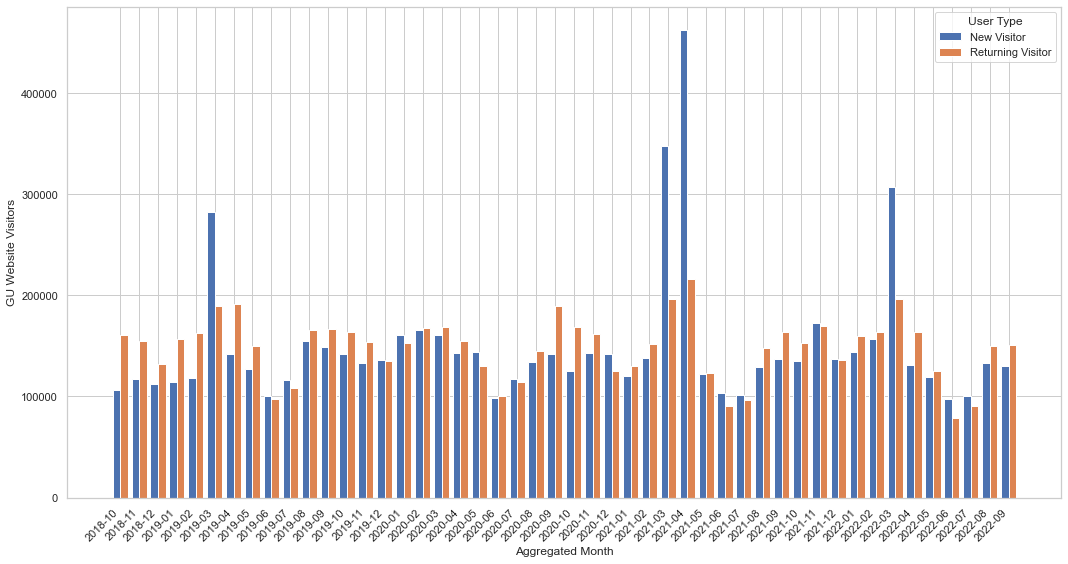

In [100]:
# Group the data by Month-Year format
web_df.reset_index(inplace=True)
grouped_by_month_year = web_df.groupby(pd.Grouper(key="Date", freq="M")).sum()
grouped_by_month_year.index = grouped_by_month_year.index.strftime("%Y-%m")
grouped_by_month_year.reset_index(inplace=True)

# Plot the chart
plt.figure()

x = np.arange(len(grouped_by_month_year))  # the label locations
width = 0.4 # the width of the bars

fig, ax = plt.subplots()
new_vist = ax.bar(x - width/2, grouped_by_month_year["New Visitor"], width,label='New Visitor')
return_visit = ax.bar(x + width/2, grouped_by_month_year["Returning Visitor"], width, label='Returning Visitor')

fig.set_figwidth(15)
fig.set_figheight(8)
ax.set_ylabel("GU Website Visitors")
ax.set_xlabel("Aggregated Month")

ax.set_xticks(x, grouped_by_month_year["Date"], rotation=45, ha="right")
ax.legend(title="User Type")

fig.tight_layout()

plt.show()